In [1]:
#load the usual libraries


%matplotlib inline

# import packages for text processing and machine learning
import pandas as pd  # DataFrame structure and operations
import numpy as np  # arrays and numerical processing
import matplotlib.pyplot as plt  # 2D plotting
import statsmodels.api as sm  # logistic regression
import statsmodels.formula.api as smf  # R-like model specification
import patsy  # translate model specification into design matrices

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING


In [6]:
import os
os.chdir("Desktop/Syracuse/IST 718 Big Data Analytics/Lab3")

In [2]:
#read coach salary data
coachsal = pd.read_csv(r"https://raw.githubusercontent.com/2SUBDA/IST_718/master/Coaches9.csv", \
                       sep = ',', header=0, na_values = "--", engine='python')

coachsal.head()

,ï»¿School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,NaN,$0,NaN
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


In [14]:
coachsal.dtypes

ï»¿School       object
Conference      object
Coach           object
SchoolPay       object
TotalPay        object
Bonus           object
BonusPaid       object
AssistantPay    object
Buyout          object
dtype: object

In [3]:
#clean up pay/bonus columns - str to float
#source: https://pbpython.com/currency-cleanup.html
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

for col in ['SchoolPay','TotalPay','Bonus','BonusPaid','AssistantPay','Buyout']:
    coachsal[col] = coachsal[col].apply(clean_currency).astype('float')

coachsal.head()

,ï»¿School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,NaN,0.0,NaN
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0


In [25]:
coachsal.isna().sum()
#decide what to do with these!

ï»¿School        0
Conference       0
Coach            0
SchoolPay        4
TotalPay         4
Bonus           22
BonusPaid       41
AssistantPay     0
Buyout          22
dtype: int64

In [4]:
#stadium size data
stad = pd.read_csv(r"https://raw.githubusercontent.com/gboeing/data-visualization/master/ncaa-football-stadiums/data/stadiums-geocoded.csv")

stad.head()

,stadium,city,state,team,conference,capacity,built,expanded,div,latitude,longitude
0,Michigan Stadium,Ann Arbor,MI,Michigan,Big Ten,107601,1927,2015,fbs,42.265869,-83.748726
1,Beaver Stadium,University Park,PA,Penn State,Big Ten,106572,1960,2001,fbs,40.812153,-77.856202
2,Ohio Stadium,Columbus,OH,Ohio State,Big Ten,104944,1922,2014,fbs,40.001686,-83.019728
3,Kyle Field,College Station,TX,Texas A&M,SEC,102733,1927,2015,fbs,30.610098,-96.340729
4,Neyland Stadium,Knoxville,TN,Tennessee,SEC,102455,1921,2010,fbs,35.954734,-83.925333


In [5]:
#only care about FBS, I think
stad = stad[stad['div'] == 'fbs']




In [42]:
#this wasn't used - turns out the data reflects all games played since the beginning of college football, not the most recent season!
foo = pd.read_html("https://en.wikipedia.org/wiki/NCAA_Division_I_FBS_football_win-loss_records", \
                    attrs={"class":"wikitable sortable"}, index_col=0)

foo[0]

,Won,Lost,Tied,Pct.,Years,Total Games,Conference
Team,,,,,,,
Michigan,962,346,36,0.729,140,1344,Big Ten
Ohio State 1,924,326,53,0.729,130,1303,Big Ten
Boise State,460,170,2,0.729,52,632,Mountain West
Notre Dame,908,326,42,0.728,130,1276,Independent
Alabama 2,916,331,43,0.727,125,1290,SEC
Oklahoma,908,327,53,0.726,125,1288,Big 12
Texas,916,375,33,0.704,127,1324,Big 12
Southern California 3,847,351,54,0.698,126,1252,Pac-12
Nebraska,902,395,40,0.690,130,1337,Big Ten


In [7]:
#read in 2019 team stats
rec = pd.read_csv("CFB2019.csv")
rec.head()

,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,...,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
0,Air Force (Mountain West),13,11-2,51,881,5483,6.22,55,421.8,17,...,34:28,78,9,7,16,12,6,18,-2,-0.15
1,Akron (MAC),12,0-12,130,725,2918,4.02,14,243.2,83,...,26:29,128,6,5,11,12,14,26,-15,-1.25
2,Alabama (SEC),13,11-2,6,842,6640,7.89,76,510.8,20,...,29:59,3,11,17,28,4,6,10,18,1.38
3,Appalachian St. (Sun Belt),14,13-1,39,969,6064,6.26,65,433.1,26,...,31:19,7,10,14,24,3,6,9,15,1.07
4,Arizona (Pac-12),12,4-8,30,873,5281,6.05,42,440.1,120,...,27:24,89,4,11,15,6,12,18,-3,-0.25


In [8]:
#parse record into win percentage
import re

winloss = rec['Win-Loss'].str.split('-',expand = True)
rec['Wins'] = winloss[0].astype(int)
rec['Losses'] = winloss[1].astype(int)
rec['WinPercent'] = rec['Wins'] / (rec['Wins'] + rec['Losses'])

rec.head()


,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,...,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Wins,Losses,WinPercent
0,Air Force (Mountain West),13,11-2,51,881,5483,6.22,55,421.8,17,...,7,16,12,6,18,-2,-0.15,11,2,0.846154
1,Akron (MAC),12,0-12,130,725,2918,4.02,14,243.2,83,...,5,11,12,14,26,-15,-1.25,0,12,0.000000
2,Alabama (SEC),13,11-2,6,842,6640,7.89,76,510.8,20,...,17,28,4,6,10,18,1.38,11,2,0.846154
3,Appalachian St. (Sun Belt),14,13-1,39,969,6064,6.26,65,433.1,26,...,14,24,3,6,9,15,1.07,13,1,0.928571
4,Arizona (Pac-12),12,4-8,30,873,5281,6.05,42,440.1,120,...,11,15,6,12,18,-3,-0.25,4,8,0.333333


In [30]:
#parse stats data to get separate team and conference columns
def getconf(name):
    r = re.compile("\(([\w -]*)\)$")
    result = r.search(name)
    return result.group(1)

rec['Conf'] = rec['Team'].apply(getconf)
rec['Team'] = rec['Team'].apply(lambda x: x.split('(')[0])

rec.head()

,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,...,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Wins,Losses,WinPercent,Conf
0,Air Force,13,11-2,51,881,5483,6.22,55,421.8,17,...,16,12,6,18,-2,-0.15,11,2,0.846154,Mountain West
1,Akron,12,0-12,130,725,2918,4.02,14,243.2,83,...,11,12,14,26,-15,-1.25,0,12,0.000000,MAC
2,Alabama,13,11-2,6,842,6640,7.89,76,510.8,20,...,28,4,6,10,18,1.38,11,2,0.846154,SEC
3,Appalachian St.,14,13-1,39,969,6064,6.26,65,433.1,26,...,24,3,6,9,15,1.07,13,1,0.928571,Sun Belt
4,Arizona,12,4-8,30,873,5281,6.05,42,440.1,120,...,15,6,12,18,-3,-0.25,4,8,0.333333,Pac-12


In [75]:
#read graduation data (from a file downloaded from the NCAA website)
grad = pd.read_html("file:///C:/Users/Jake/Desktop/Syracuse/IST%20718%20Big%20Data%20Analytics/Lab3/Graduation%20Success%20Rate.html")
grad = grad[0]
grad.head()


,Cohort Year,School,Conference,Sport,State,GSR,FGR,GSR Report,FGR Report
0,2006,University of Akron,Mid-American Conference,Football,OH,58,52.0,NaN,NaN
1,2006,Alabama A&M University,Southwestern Athletic Conf.,Football,AL,40,45.0,NaN,NaN
2,2006,Alabama State University,Southwestern Athletic Conf.,Football,AL,81,59.0,NaN,NaN
3,2006,University of Alabama,Southeastern Conference,Football,AL,73,57.0,NaN,NaN
4,2006,University of Alabama at Birmingham,Conference USA,Football,AL,60,55.0,NaN,NaN


In [14]:
coachsal['School'] = coachsal['ï»¿School']


In [40]:
#attempt to join!
#1: join salary and stadium data

import fuzzymatcher

left_on = ["School", "Conference"] 
right_on = ["team", "conference"]




dfjoinedsalstad = fuzzymatcher.fuzzy_left_join(coachsal,stad, left_on, right_on) #Merge on School and Conference
dfjoinedsalstad = pd.DataFrame(dfjoinedsalstad) #Dataframe creation
dfjoinedsalstad = dfjoinedsalstad.sort_values(by='best_match_score', ascending = False) #
dfjoinedsalstad

,best_match_score,__id_left,__id_right,ï»¿School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,...,city,state,team,conference,capacity,built,expanded,div,latitude,longitude
68,0.524649,37_left,116_right,Georgia Southern,Sun Belt,Chad Lunsford,650000.0,650000.0,295000.0,NaN,...,Statesboro,GA,Georgia Southern,Sun Belt,24300.0,1984.0,2014,fbs,32.412212,-81.783171
83,0.506875,51_left,97_right,Louisiana Tech,C-USA,Skip Holtz,700000.0,700000.0,395000.0,0.0,...,Ruston,LA,Louisiana Tech,C-USA,30600.0,1968.0,1989,fbs,32.532238,-92.656019
85,0.506194,53_left,99_right,Louisiana-Monroe,Sun Belt,Matt Viator,390000.0,390000.0,50000.0,0.0,...,Monroe,LA,Louisiana-Monroe,Sun Belt,30427.0,1978.0,1993,fbs,32.531069,-92.066441
84,0.506194,52_left,82_right,Louisiana-Lafayette,Sun Belt,Billy Napier,850000.0,850000.0,435000.0,NaN,...,Lafayette,LA,Louisiana-Lafayette,Sun Belt,36900.0,1971.0,NaN,fbs,30.215796,-92.016264
169,0.503735,95_left,89_right,South Alabama,Sun Belt,Steve Campbell,600000.0,600000.0,295000.0,NaN,...,Mobile,AL,South Alabama,Sun Belt,33500.0,1948.0,2009,fbs,30.674239,-88.075633
206,0.495084,124_left,45_right,West Virginia,Big 12,Dana Holgorsen,3605000.0,3617500.0,1000000.0,90000.0,...,Morgantown,WV,West Virginia,Big 12,60000.0,1980.0,2004,fbs,39.652220,-79.955175
207,0.488191,125_left,123_right,Western Kentucky,C-USA,Mike Sanford Jr.,800000.0,805850.0,400000.0,0.0,...,Bowling Green,KY,Western Kentucky,C-USA,22113.0,1968.0,2008,fbs,36.984877,-86.459014
184,0.472752,105_left,3_right,Texas A&M,SEC,Jimbo Fisher,7500000.0,7500000.0,1350000.0,NaN,...,College Station,TX,Texas A&M,SEC,102733.0,1927.0,2015,fbs,30.610098,-96.340729
168,0.467735,94_left,98_right,San Jose State,Mt. West,Brent Brennan,590424.0,590424.0,210000.0,0.0,...,San Jose,CA,San Jose State,Mountain West,30456.0,1933.0,1985,fbs,37.320105,-121.868116
136,0.467532,77_left,96_right,North Texas,C-USA,Seth Littrell,1425000.0,1425000.0,580000.0,130000.0,...,Denton,TX,North Texas,C-USA,30850.0,2011.0,NaN,fbs,33.203935,-97.159224


In [25]:
#check intitial join
dfjoinedsalstad.head()

,best_match_score,__id_left,__id_right,ï»¿School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,...,city,state,team,conference,capacity,built,expanded,div,latitude,longitude
68,0.524649,37_left,116_right,Georgia Southern,Sun Belt,Chad Lunsford,650000.0,650000.0,295000.0,NaN,...,Statesboro,GA,Georgia Southern,Sun Belt,24300.0,1984.0,2014,fbs,32.412212,-81.783171
83,0.506875,51_left,97_right,Louisiana Tech,C-USA,Skip Holtz,700000.0,700000.0,395000.0,0.0,...,Ruston,LA,Louisiana Tech,C-USA,30600.0,1968.0,1989,fbs,32.532238,-92.656019
85,0.506194,53_left,99_right,Louisiana-Monroe,Sun Belt,Matt Viator,390000.0,390000.0,50000.0,0.0,...,Monroe,LA,Louisiana-Monroe,Sun Belt,30427.0,1978.0,1993,fbs,32.531069,-92.066441
84,0.506194,52_left,82_right,Louisiana-Lafayette,Sun Belt,Billy Napier,850000.0,850000.0,435000.0,NaN,...,Lafayette,LA,Louisiana-Lafayette,Sun Belt,36900.0,1971.0,NaN,fbs,30.215796,-92.016264
169,0.503735,95_left,89_right,South Alabama,Sun Belt,Steve Campbell,600000.0,600000.0,295000.0,NaN,...,Mobile,AL,South Alabama,Sun Belt,33500.0,1948.0,2009,fbs,30.674239,-88.075633


In [35]:
grad.head()

,School,Conference,GSR,FGR
0,University of Akron,Mid-American Conference,58,52.0
1,Alabama A&M University,Southwestern Athletic Conf.,40,45.0
2,Alabama State University,Southwestern Athletic Conf.,81,59.0
3,University of Alabama,Southeastern Conference,73,57.0
4,University of Alabama at Birmingham,Conference USA,60,55.0


In [41]:
#join with graduate data
grad.head()
grad = grad[['School','Conference','GSR','FGR']]

dfjoinedsalstad = dfjoinedsalstad.drop(['best_match_score','__id_left','__id_right','div'],axis = 1)

left_on = ["School", "Conference"] 
right_on = ["School", "Conference"]


dfjoinedsalstadgrad = fuzzymatcher.fuzzy_left_join(dfjoinedsalstad,grad, left_on, right_on) #Merge on School and Conference
dfjoinedsalstadgrad = pd.DataFrame(dfjoinedsalstadgrad) #Dataframe creation
dfjoinedsalstadgrad = dfjoinedsalstadgrad.sort_values(by='best_match_score', ascending = False) #
dfjoinedsalstadgrad.head()


,best_match_score,__id_left,__id_right,ï»¿School,Conference_left,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,...,conference,capacity,built,expanded,latitude,longitude,School_right,Conference_right,GSR,FGR
50,0.609262,5_left,226_right,West Virginia,Big 12,Dana Holgorsen,3605000.0,3617500.0,1000000.0,90000.0,...,Big 12,60000.0,1980.0,2004,39.652220,-79.955175,West Virginia University,Big 12 Conference,80.0,61.0
23,0.603240,2_left,138_right,Louisiana-Monroe,Sun Belt,Matt Viator,390000.0,390000.0,50000.0,0.0,...,Sun Belt,30427.0,1978.0,1993,32.531069,-92.066441,University of Louisiana Monroe,Sun Belt Conference,59.0,51.0
531,0.570583,122_left,125_right,Nevada-Las Vegas,Mt. West,Tony Sanchez,600000.0,600000.0,260000.0,0.0,...,Mountain West,30000.0,1966.0,2016,39.546925,-119.817560,"University of Nevada, Las Vegas",Mountain West Conference,64.0,69.0
24,0.518318,3_left,188_right,Louisiana-Lafayette,Sun Belt,Billy Napier,850000.0,850000.0,435000.0,NaN,...,Sun Belt,36900.0,1971.0,NaN,30.215796,-92.016264,University of Louisiana at Lafayette,Sun Belt Conference,65.0,62.0
543,0.487498,125_left,4_right,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,...,SEC,101821.0,1929.0,2010,33.207490,-87.550392,University of Alabama at Birmingham,Conference USA,60.0,55.0


In [44]:
#Finally, join with W/L data

dfjoinedsalstadgrad = dfjoinedsalstadgrad.drop(['best_match_score','__id_left','__id_right'],axis = 1)

rec = rec[['Team','Conf','WinPercent']]

left_on = ["School_left", "Conference_left"] 
right_on = ["Team", "Conf"]


dfjoinedall = fuzzymatcher.fuzzy_left_join(dfjoinedsalstadgrad,rec, left_on, right_on) #Merge w/ W/L record
dfjoinedall = pd.DataFrame(dfjoinedall) #Dataframe creation
dfjoinedall = dfjoinedall.sort_values(by='best_match_score', ascending = False) #
dfjoinedall.head()

,best_match_score,__id_left,__id_right,ï»¿School,Conference_left,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,...,expanded,latitude,longitude,School_right,Conference_right,GSR,FGR,Team,Conf,WinPercent
139,0.525180,47_left,50_right,Louisiana Tech,C-USA,Skip Holtz,700000.0,700000.0,395000.0,0.0,...,1989,32.532238,-92.656019,Louisiana Tech University,Western Athletic Conference,79.0,57.0,Louisiana Tech,C-USA,0.769231
182,0.480761,66_left,103_right,Texas A&M,SEC,Jimbo Fisher,7500000.0,7500000.0,1350000.0,NaN,...,2015,30.610098,-96.340729,"Texas A&M University, College Station",Southeastern Conference,74.0,64.0,Texas A&M,SEC,0.615385
0,0.473536,0_left,125_right,West Virginia,Big 12,Dana Holgorsen,3605000.0,3617500.0,1000000.0,90000.0,...,2004,39.652220,-79.955175,West Virginia University,Big 12 Conference,80.0,61.0,West Virginia,Big 12,0.416667
305,0.467792,89_left,72_right,North Texas,C-USA,Seth Littrell,1425000.0,1425000.0,580000.0,130000.0,...,NaN,33.203935,-97.159224,University of North Texas,Sun Belt Conference,65.0,62.0,North Texas,C-USA,0.333333
196,0.465396,71_left,80_right,Old Dominion,C-USA,Bobby Wilder,654667.0,654667.0,504895.0,0.0,...,2009,36.888781,-76.305676,Old Dominion University,Colonial Athletic Association,50.0,NaN,Old Dominion,C-USA,0.083333


In [45]:
#write to Excel for manual review of the merge
dfjoinedall.to_csv("combined.csv") 

In [47]:
#load edited df from Excel
dffinal = pd.read_csv("combined_edited.csv")
dffinal.head()

,Team,Conference_left,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,stadium,city,state,capacity,built,expanded,latitude,longitude,GSR,FGR,WinPercent
0,Louisiana Tech,C-USA,Skip Holtz,700000,700000,395000.0,0.0,0,2508333.0,Joe Aillet Stadium,Ruston,LA,30600,1968,1989.0,32.532238,-92.656019,79.0,57.0,0.769231
1,Texas A&M,SEC,Jimbo Fisher,7500000,7500000,1350000.0,NaN,0,68125000.0,Kyle Field,College Station,TX,102733,1927,2015.0,30.610098,-96.340729,74.0,64.0,0.615385
2,West Virginia,Big 12,Dana Holgorsen,3605000,3617500,1000000.0,90000.0,0,7150000.0,Mountaineer Field at Milan Puskar Stadium,Morgantown,WV,60000,1980,2004.0,39.652220,-79.955175,80.0,61.0,0.416667
3,North Texas,C-USA,Seth Littrell,1425000,1425000,580000.0,130000.0,0,4425000.0,Apogee Stadium,Denton,TX,30850,2011,NaN,33.203935,-97.159224,65.0,62.0,0.333333
4,Old Dominion,C-USA,Bobby Wilder,654667,654667,504895.0,0.0,0,1200000.0,Foreman Field,Norfolk,VA,20118,1936,2009.0,36.888781,-76.305676,50.0,NaN,0.083333


In [48]:
dffinal.isna().sum()

Team                0
Conference_left     0
Coach               0
SchoolPay           0
TotalPay            0
Bonus              16
BonusPaid          34
AssistantPay        0
Buyout             16
stadium             0
city                0
state               0
capacity            0
built               0
expanded           18
latitude            0
longitude           0
GSR                 3
FGR                 5
WinPercent          0
dtype: int64

In [49]:
dffinal['Conf'] = dffinal['Conference_left']

In [51]:
dffinal['Conf'].unique()

array(['C-USA', 'SEC', 'Big 12', 'ACC', 'Pac-12', 'MAC', 'Mt. West',
       'Big Ten', 'Sun Belt', 'AAC', 'Ind.'], dtype=object)

In [54]:
#distinguish Power 5 (top conference) schools.
pow5 = ['ACC','Big Ten','Big 12','Pac-12','SEC']

dffinal['IsPower5'] = dffinal['Conf'].apply(lambda x: x in pow5)



In [60]:
#label us for graphing
dffinal['IsSyracuse'] = dffinal['Team'].apply(lambda x: x == 'Syracuse')

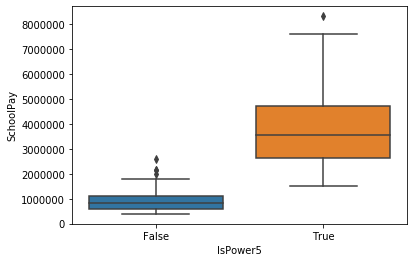

In [55]:
#plot salary, Power 5 vs. everyone else
sns.boxplot(x="IsPower5", y="SchoolPay", data=dffinal)

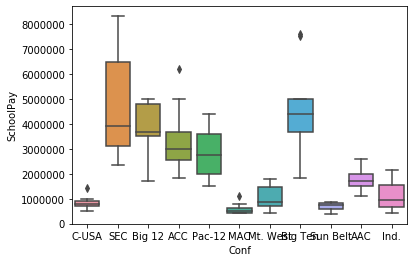

In [56]:
#plot individual conferences
sns.boxplot(x="Conf", y="SchoolPay", data=dffinal)

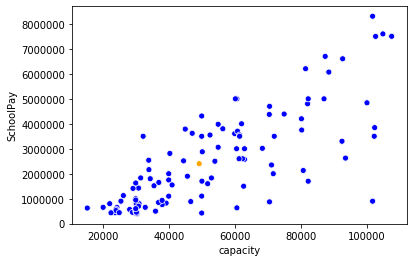

In [64]:
#plot pay vs. stadium size
sns.scatterplot(data = dffinal, x = 'capacity', y = 'SchoolPay', hue = 'IsSyracuse', palette = ['blue','orange'], legend = False)

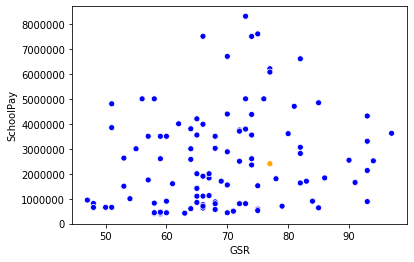

In [67]:
#plot GSR grad rate vs. pay
sns.scatterplot(data = dffinal, x = 'GSR', y = 'SchoolPay', hue = 'IsSyracuse', palette = ['blue','orange'], legend = False)

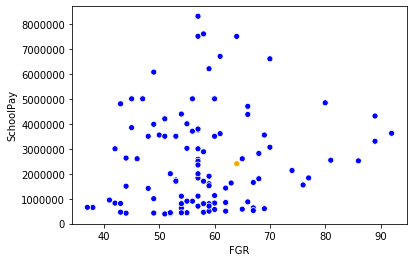

In [68]:
#plot FGR grad rate vs. pay
sns.scatterplot(data = dffinal, x = 'FGR', y = 'SchoolPay', hue = 'IsSyracuse', palette = ['blue','orange'], legend = False)

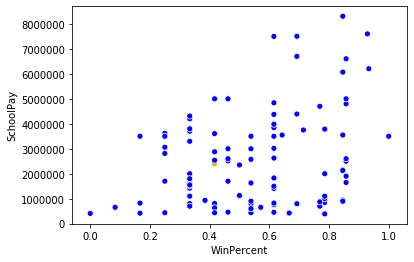

In [70]:
#plot win percentage vs. pay
sns.scatterplot(data = dffinal, x = 'WinPercent', y = 'SchoolPay', hue = 'IsSyracuse', palette = ['blue','orange'], legend = False)

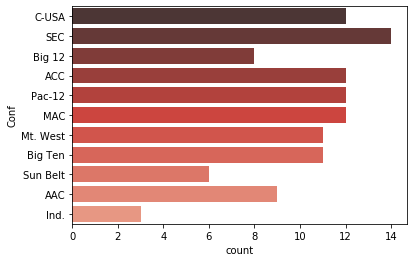

In [71]:
#after preproccessing, how many schools do we have per conference?
sns.countplot(y="Conf", data=dffinal, palette="Reds_d")

In [73]:
dffinal.dtypes

Team                object
Conference_left     object
Coach               object
SchoolPay            int64
TotalPay             int64
Bonus              float64
BonusPaid          float64
AssistantPay         int64
Buyout             float64
stadium             object
city                object
state               object
capacity             int64
built                int64
expanded           float64
latitude           float64
longitude          float64
GSR                float64
FGR                float64
WinPercent         float64
Conf                object
IsPower5              bool
IsSyracuse            bool
dtype: object

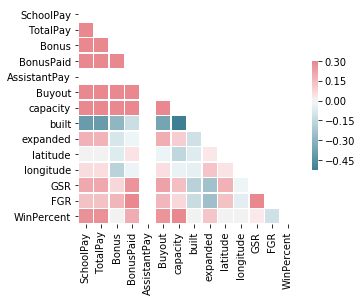

In [74]:
#heatmap between numeric cols - based on Week 3 exercise
dfnum = dffinal[['SchoolPay','TotalPay','Bonus','BonusPaid','AssistantPay','Buyout','capacity','built','expanded', \
                'latitude','longitude','GSR','FGR','WinPercent']]

corr = dfnum.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [77]:
#create train and test
from scipy.stats import uniform


np.random.seed(1234)
dffinal['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(dffinal))
dffinal_train = dffinal[dffinal['runiform'] >= 0.33]
dffinal_test = dffinal[dffinal['runiform'] < 0.33]

dffinal_train.shape

(80, 24)

In [79]:
dffinal_train.dtypes


Team                object
Conference_left     object
Coach               object
SchoolPay            int64
TotalPay             int64
Bonus              float64
BonusPaid          float64
AssistantPay         int64
Buyout             float64
stadium             object
city                object
state               object
capacity             int64
built                int64
expanded           float64
latitude           float64
longitude          float64
GSR                float64
FGR                float64
WinPercent         float64
Conf                object
IsPower5              bool
IsSyracuse            bool
runiform           float64
dtype: object

In [80]:
#first formula - use everything except the other pay columns
my_model = str('SchoolPay ~ capacity + built  + expanded + latitude + longitude + GSR + FGR + WinPercent + Conf')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = dffinal_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
dffinal_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
dffinal_test['predict_salary'] = train_model_fit.predict(dffinal_test)

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     10.53
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           1.36e-10
Time:                        18:53:08   Log-Likelihood:                -946.76
No. Observations:                  63   AIC:                             1932.
Df Residuals:                      44   BIC:                             1972.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4.576e+07   3.42e+07  

C:\Users\Jake\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Jake\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [88]:
#2nd attempt: only using variables found to be significant:
my_model2 = str('SchoolPay ~ capacity + WinPercent + Conf')

# fit the model to the training set
train_model_fit = smf.ols(my_model2, data = dffinal_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
dffinal_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
dffinal_test['predict_salary'] = train_model_fit.predict(dffinal_test)


                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     18.66
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           6.54e-17
Time:                        19:13:42   Log-Likelihood:                -1207.0
No. Observations:                  80   AIC:                             2440.
Df Residuals:                      67   BIC:                             2471.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.311e+05   5.03e+05  

C:\Users\Jake\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Jake\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [82]:
#3rd attempt: for conference, only look at Power 5 vs. not
my_model2 = str('SchoolPay ~ capacity + WinPercent + IsPower5')

# fit the model to the training set
train_model_fit = smf.ols(my_model2, data = dffinal_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
dffinal_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
dffinal_test['predict_salary'] = train_model_fit.predict(dffinal_test)


                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     69.44
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           1.02e-21
Time:                        19:07:15   Log-Likelihood:                -1213.0
No. Observations:                  80   AIC:                             2434.
Df Residuals:                      76   BIC:                             2444.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6.862e+05   3.26e+05  

C:\Users\Jake\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Jake\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [89]:
dffinal_train[dffinal_train['Team'] == 'Syracuse']

,Team,Conference_left,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,stadium,...,longitude,GSR,FGR,WinPercent,Conf,IsPower5,IsSyracuse,runiform,predict_attend,predict_salary
61,Syracuse,ACC,Dino Babers,2401206,2401206,NaN,NaN,0,NaN,Carrier Dome,...,-76.13652,77.0,64.0,0.416667,ACC,True,True,0.624917,2.925504e+06,2.925504e+06
